# Projet de Prédiction du Churn Client - Prétraitement des Données

## Objectif
Ce notebook documente le processus de prétraitement des données pour notre modèle de prédiction du churn client. Nous analysons et préparons les données pour l'entraînement d'un modèle de machine learning.

## Structure des Données
- **Nombre total d'observations** : 7043 clients
- **Variables** : 21 colonnes incluant la variable cible (Churn)

### Types de Variables
1. **Variables Catégorielles** :
   - Binaires : gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn
   - Multiples : MultipleLines, InternetService, Contract, PaymentMethod

2. **Variables Numériques** :
   - tenure : Durée d'abonnement en mois
   - MonthlyCharges : Montant facturé mensuellement
   - TotalCharges : Montant total facturé

## Étapes de Prétraitement
1. **Nettoyage des Données**
   - Gestion des valeurs manquantes
   - Suppression des doublons
   - Conversion des types de données

2. **Feature Engineering**
   - Encodage des variables catégorielles
   - Standardisation des variables numériques

3. **Division des Données**
   - Train (60%) : 4225 observations
   - Validation (20%) : 1409 observations
   - Test (20%) : 1409 observations

## Notes Importantes
- Les données sont divisées de manière aléatoire mais avec une graine fixe (random_state=42)
- La standardisation est appliquée uniquement sur les variables numériques
- L'encodage préserve la nature des variables catégorielles

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


## 1. Chargement et Exploration Initiale

In [18]:
# Charger les données
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Afficher les informations générales
print("\nInformations sur le dataset :")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Afficher les premières lignes
print("\nAperçu des données :")
df.head()


Informations sur le dataset :
Nombre de lignes : 7043
Nombre de colonnes : 21

Aperçu des données :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Analyse des Types de Variables

In [4]:
# Afficher les types de données
print("Types de données par colonne :")
df.dtypes.sort_values()

# Séparer les colonnes par type
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]
target_column = 'Churn'

# Afficher le nombre de valeurs uniques par colonne
print("\nNombre de valeurs uniques par colonne :")
df.nunique()

Types de données par colonne :

Nombre de valeurs uniques par colonne :


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## 3. Analyse des Valeurs Manquantes

Valeurs manquantes par colonne :
Series([], dtype: int64)


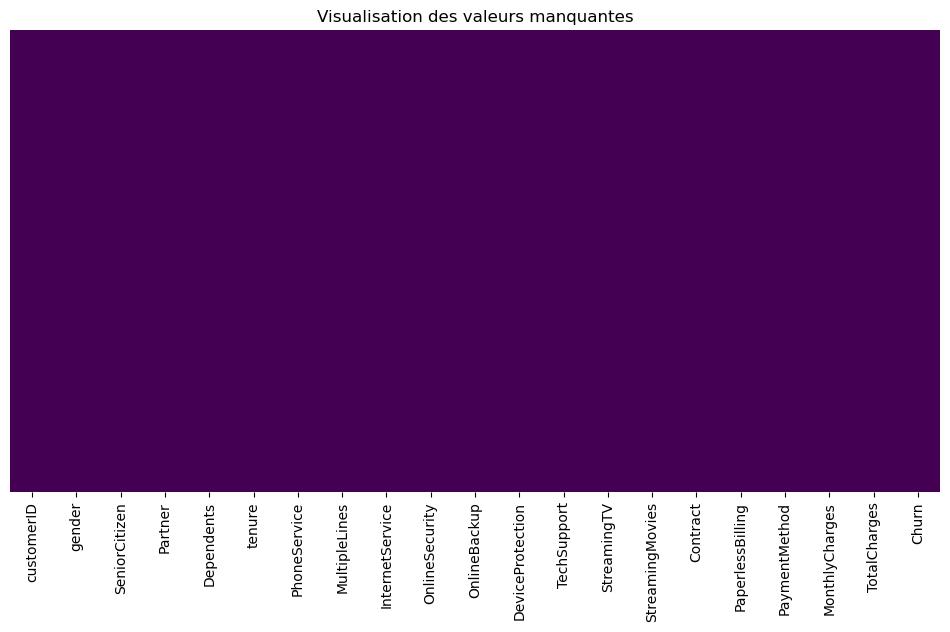

In [5]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Visualiser les valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisation des valeurs manquantes')
plt.show()

## 4. Analyse des Variables Numériques

Statistiques descriptives des variables numériques :


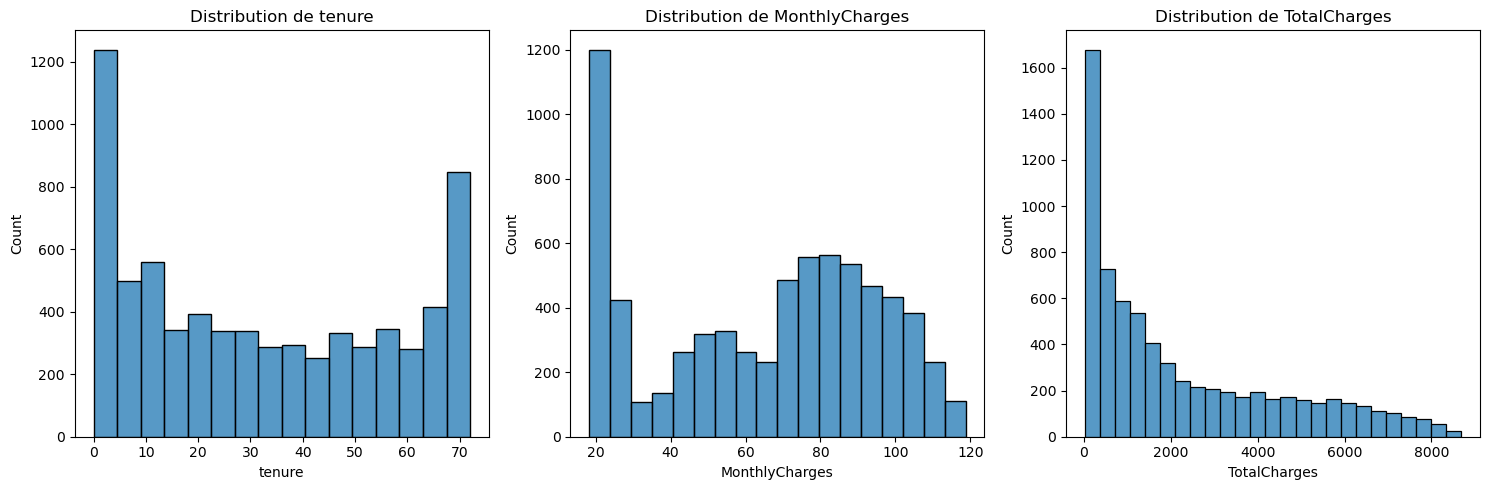

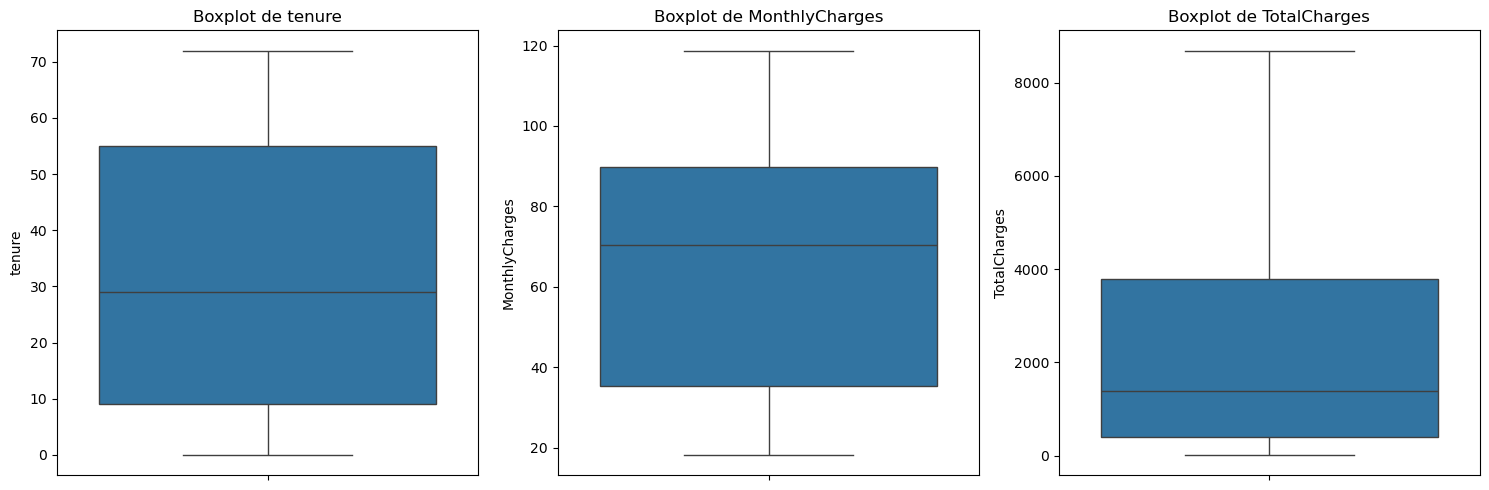

In [6]:
# Convertir TotalCharges en numérique
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Statistiques descriptives des variables numériques
print("Statistiques descriptives des variables numériques :")
df[numeric_columns].describe()

# Visualiser la distribution des variables numériques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

# Boxplots pour détecter les outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## 5. Analyse des Variables Catégorielles

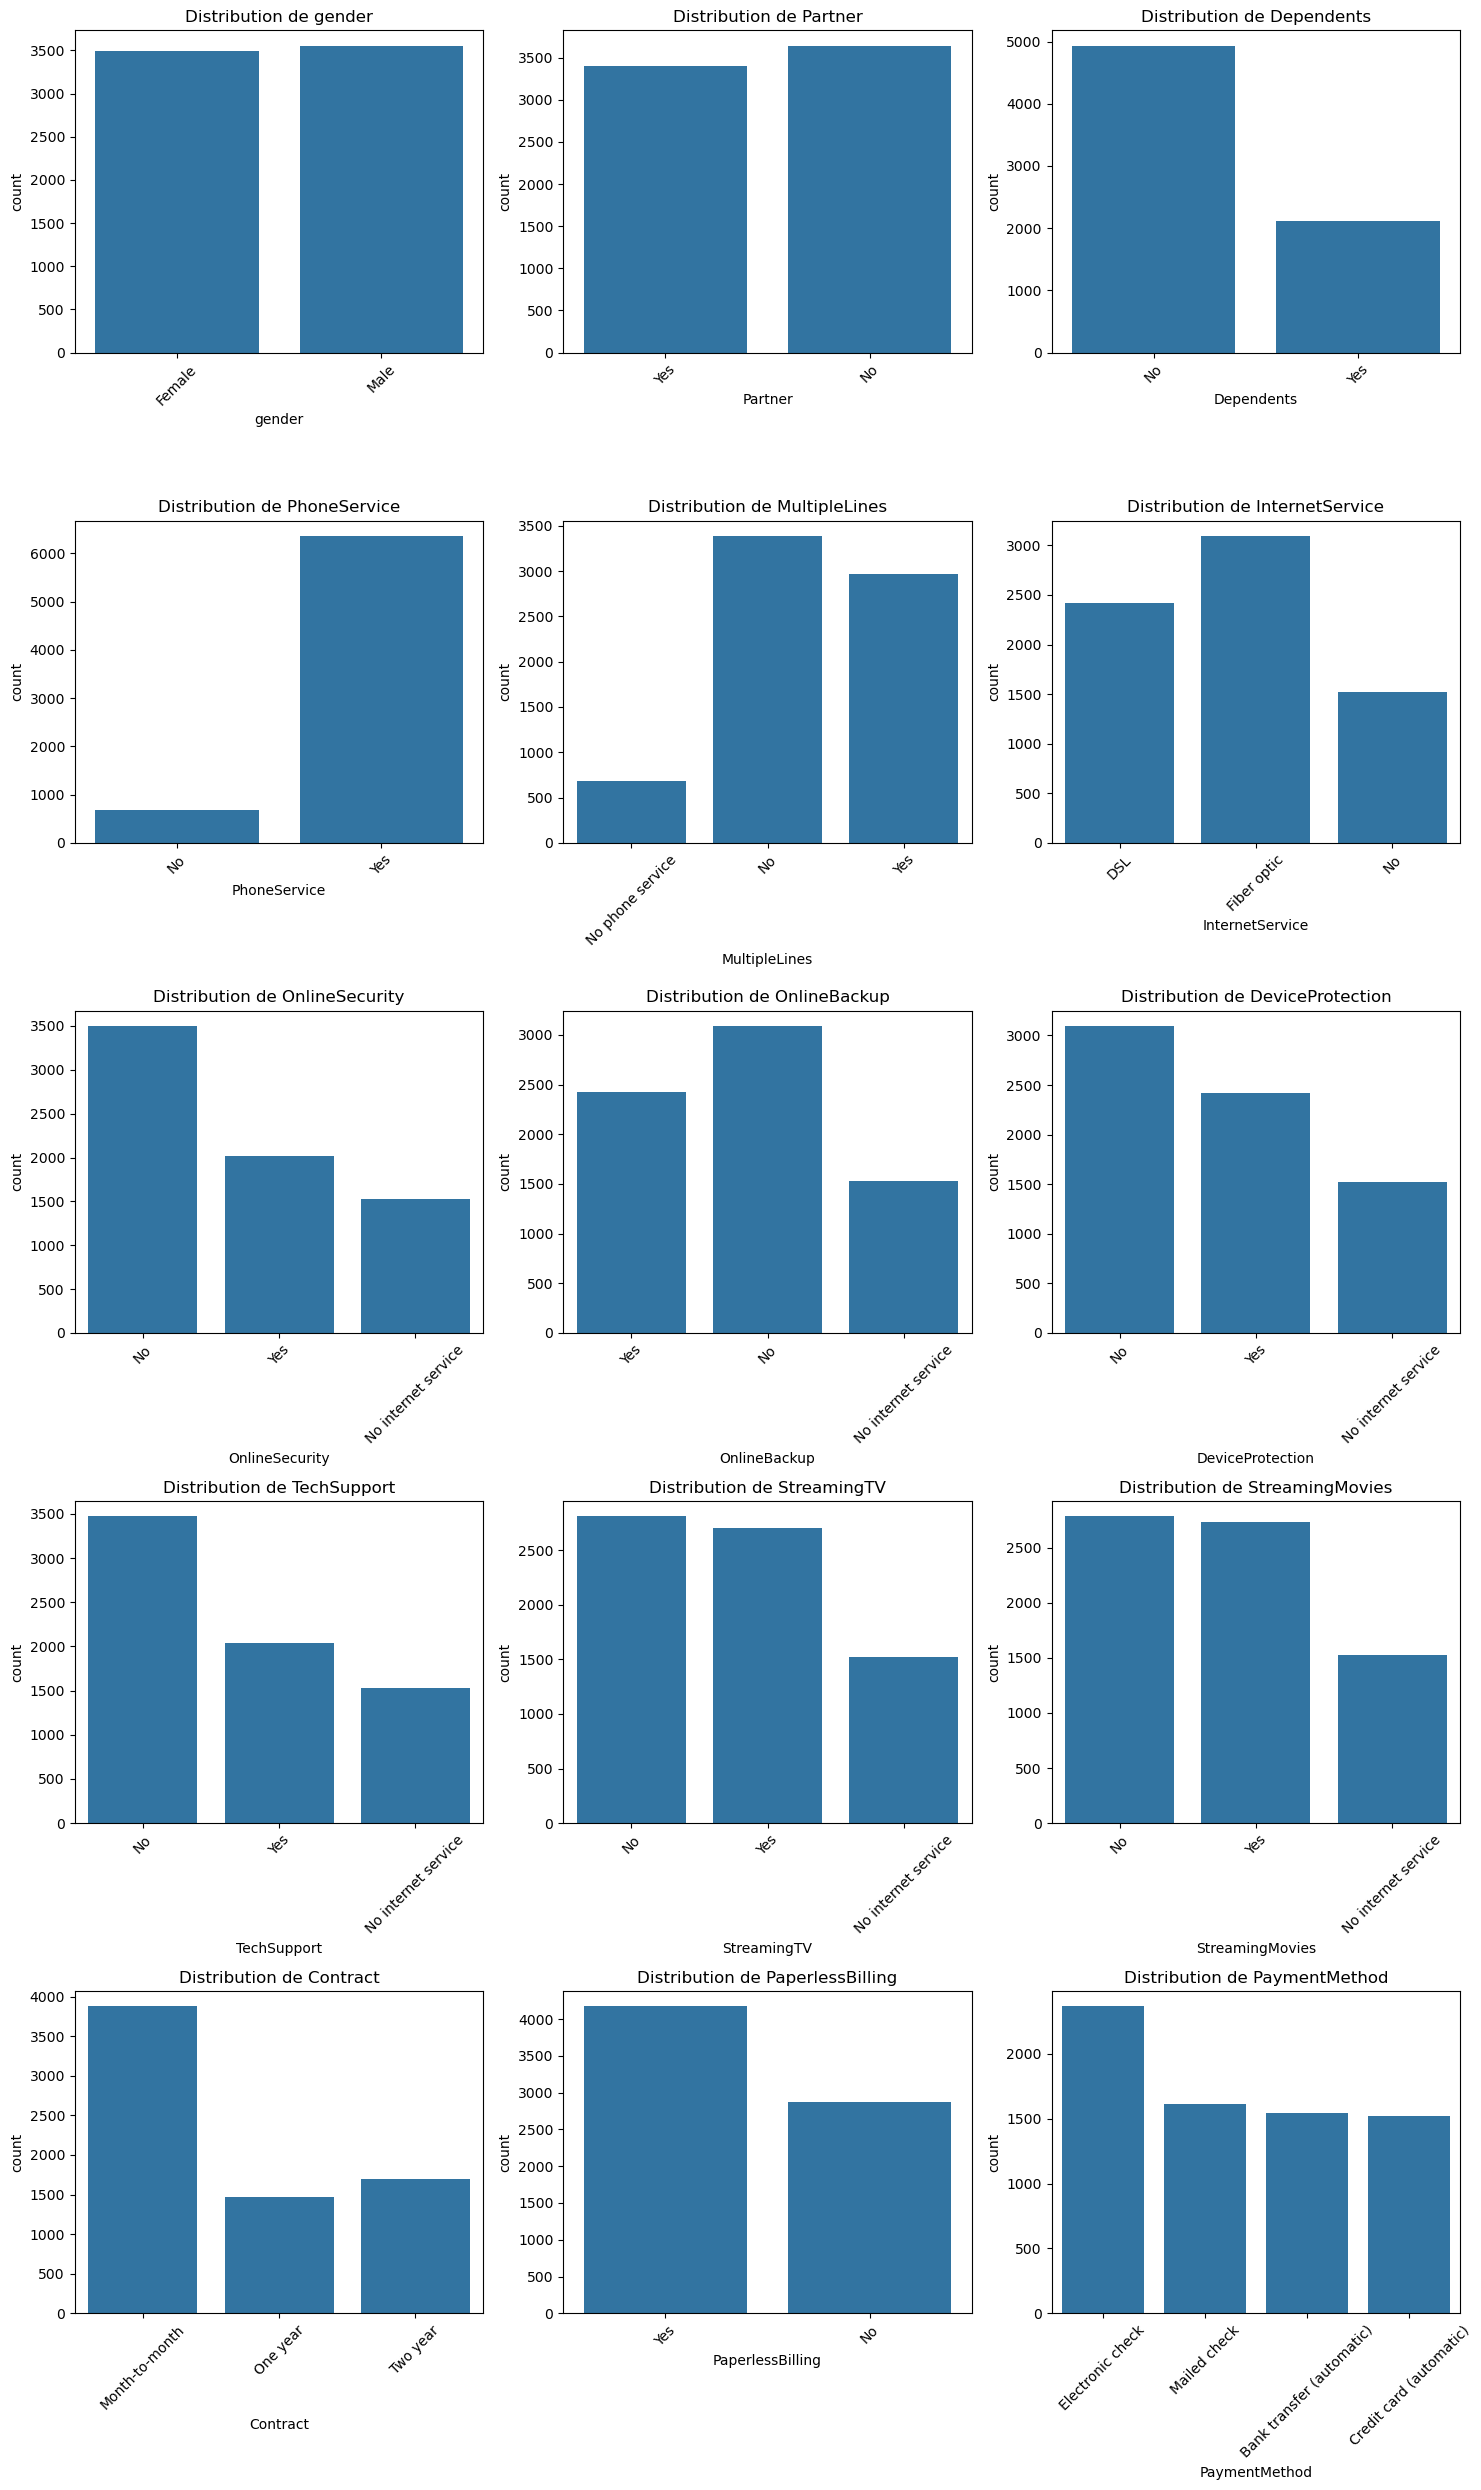

In [7]:
# Fonction pour afficher la distribution des variables catégorielles
def plot_categorical_distribution(df, columns, ncols=3):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
    axes = axes.ravel()
    
    for idx, col in enumerate(columns):
        sns.countplot(data=df, x=col, ax=axes[idx])
        axes[idx].set_title(f'Distribution de {col}')
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Masquer les axes vides
    for idx in range(len(columns), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Afficher la distribution des variables catégorielles
plot_categorical_distribution(df, categorical_columns)

## 6. Analyse de la Variable Cible (Churn)

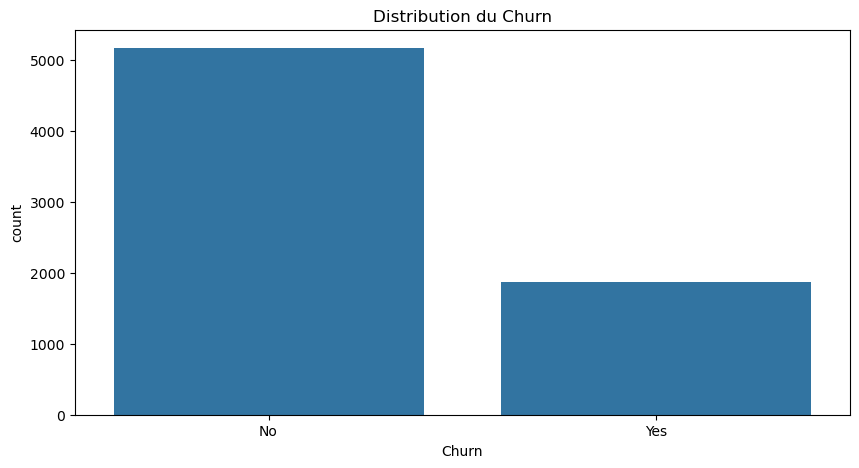


Pourcentage de churn :
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [8]:
# Distribution du Churn
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribution du Churn')
plt.show()

# Pourcentage de churn
churn_pct = df['Churn'].value_counts(normalize=True) * 100
print("\nPourcentage de churn :")
print(churn_pct)

## 7. Prétraitement des Données

### 7.1 Nettoyage des Données

In [9]:
# Supprimer la colonne customerID
df = df.drop('customerID', axis=1)

# Gérer les valeurs manquantes numériques
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Gérer les valeurs manquantes catégorielles
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Vérifier qu'il n'y a plus de valeurs manquantes
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum().sum())

Valeurs manquantes après nettoyage :
0


C:\Users\guyla\AppData\Local\Temp\ipykernel_26156\3256349645.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\guyla\AppData\Local\Temp\ipykernel_26156\3256349645.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

### Liste de toutes les colonnes catégorielles


Analyse de la variable : gender
       Nombre  Pourcentage
1        3555        50.48
0        3488        49.52
TOTAL    7043       100.00




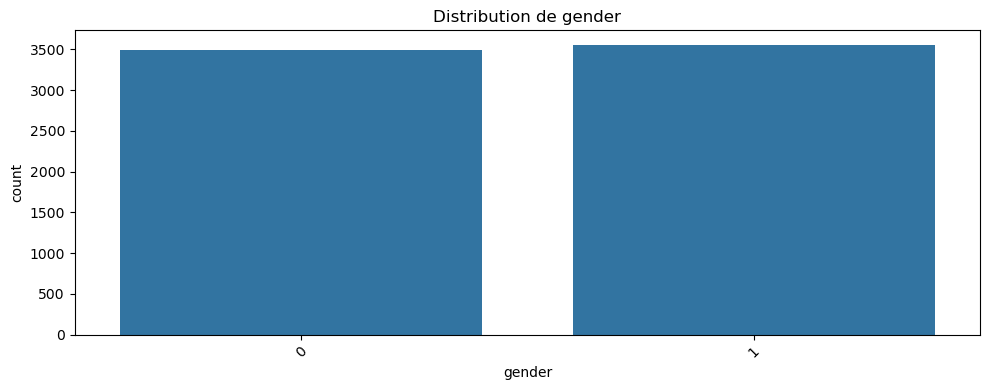


Analyse de la variable : Partner
       Nombre  Pourcentage
0        3641        51.70
1        3402        48.30
TOTAL    7043       100.00




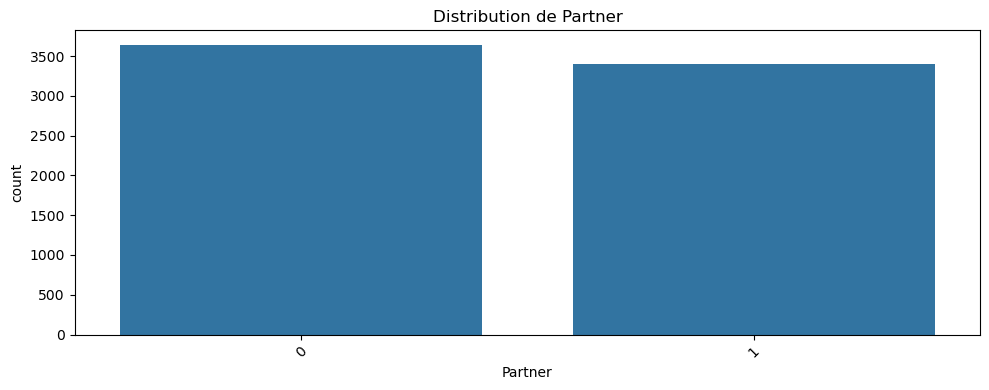


Analyse de la variable : Dependents
       Nombre  Pourcentage
0        4933        70.04
1        2110        29.96
TOTAL    7043       100.00




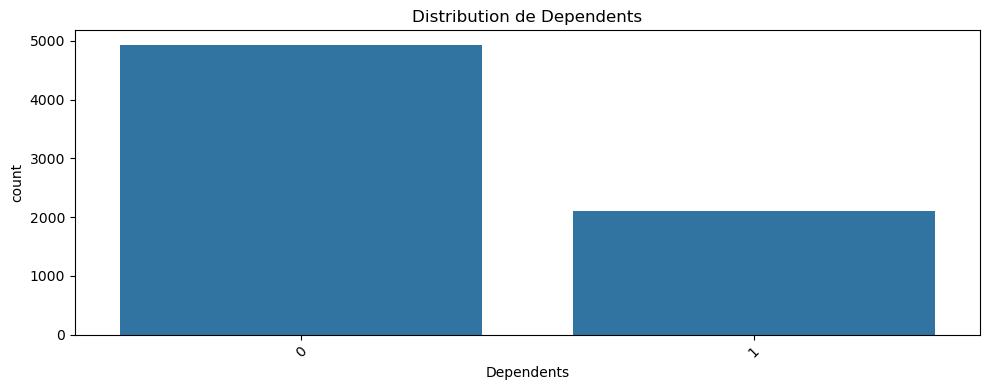


Analyse de la variable : PhoneService
       Nombre  Pourcentage
1        6361        90.32
0         682         9.68
TOTAL    7043       100.00




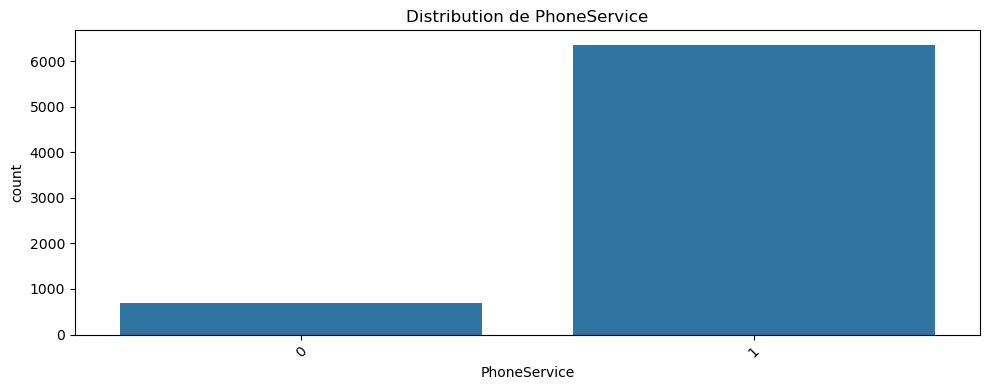


Analyse de la variable : MultipleLines
       Nombre  Pourcentage
0        3390        48.13
2        2971        42.18
1         682         9.68
TOTAL    7043       100.00




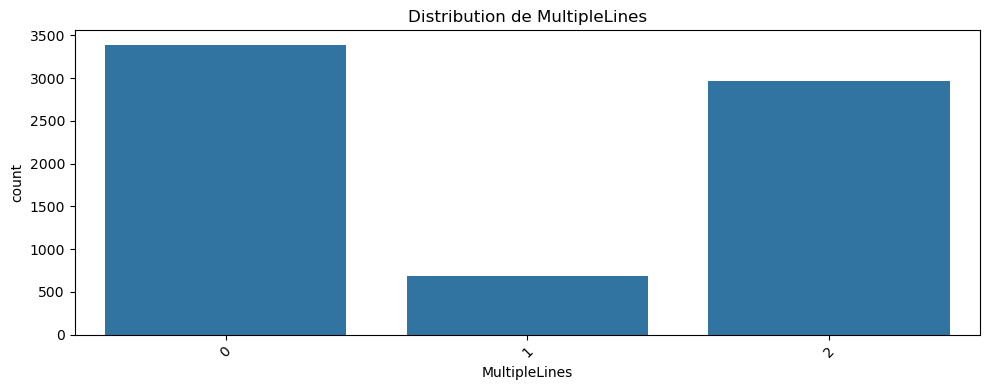


Analyse de la variable : InternetService
       Nombre  Pourcentage
1        3096        43.96
0        2421        34.37
2        1526        21.67
TOTAL    7043       100.00




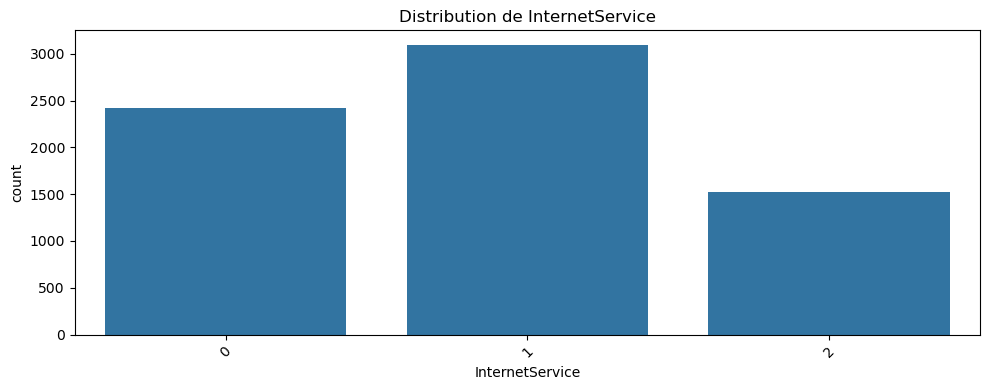


Analyse de la variable : OnlineSecurity
       Nombre  Pourcentage
0        3498        49.67
2        2019        28.67
1        1526        21.67
TOTAL    7043       100.00




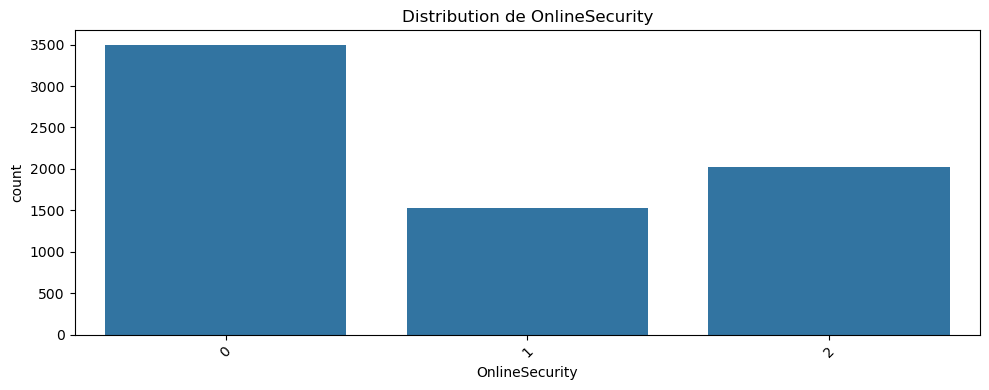


Analyse de la variable : OnlineBackup
       Nombre  Pourcentage
0        3088        43.84
2        2429        34.49
1        1526        21.67
TOTAL    7043       100.00




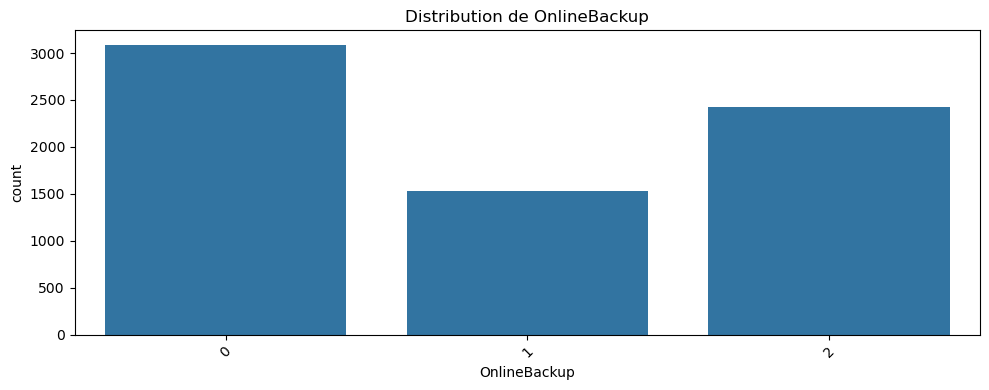


Analyse de la variable : DeviceProtection
       Nombre  Pourcentage
0        3095        43.94
2        2422        34.39
1        1526        21.67
TOTAL    7043       100.00




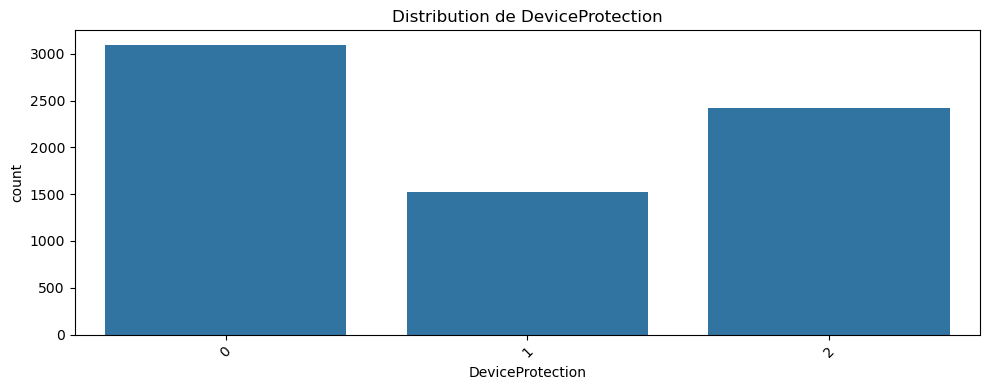


Analyse de la variable : TechSupport
       Nombre  Pourcentage
0        3473        49.31
2        2044        29.02
1        1526        21.67
TOTAL    7043       100.00




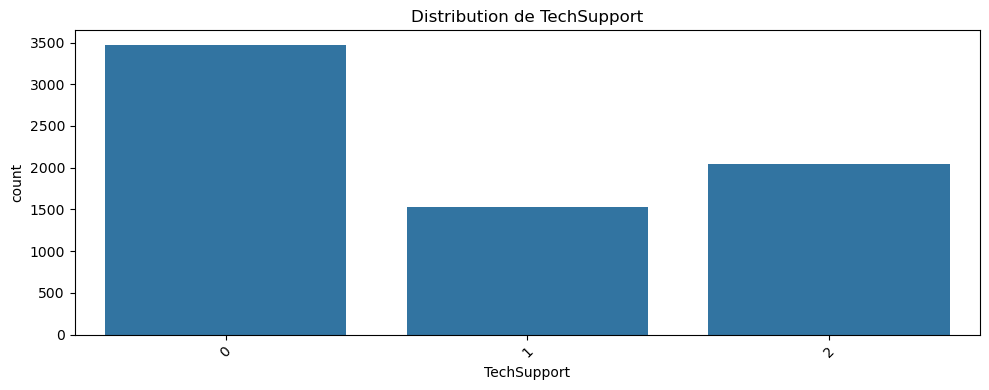


Analyse de la variable : StreamingTV
       Nombre  Pourcentage
0        2810        39.90
2        2707        38.44
1        1526        21.67
TOTAL    7043       100.00




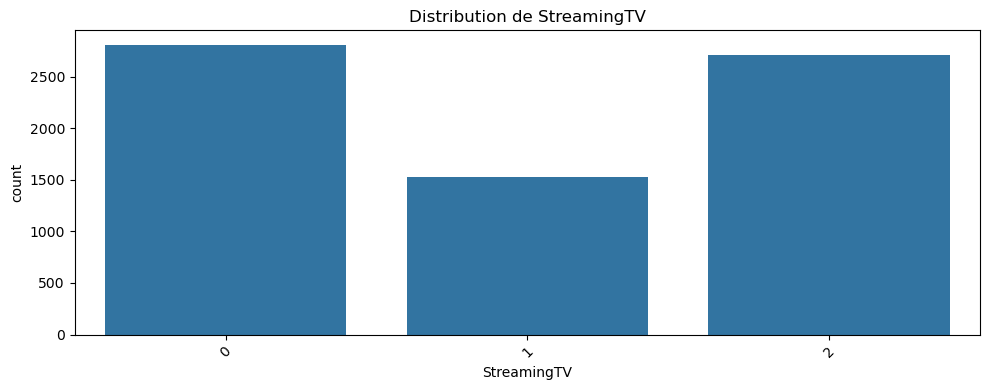


Analyse de la variable : StreamingMovies
       Nombre  Pourcentage
0        2785        39.54
2        2732        38.79
1        1526        21.67
TOTAL    7043       100.00




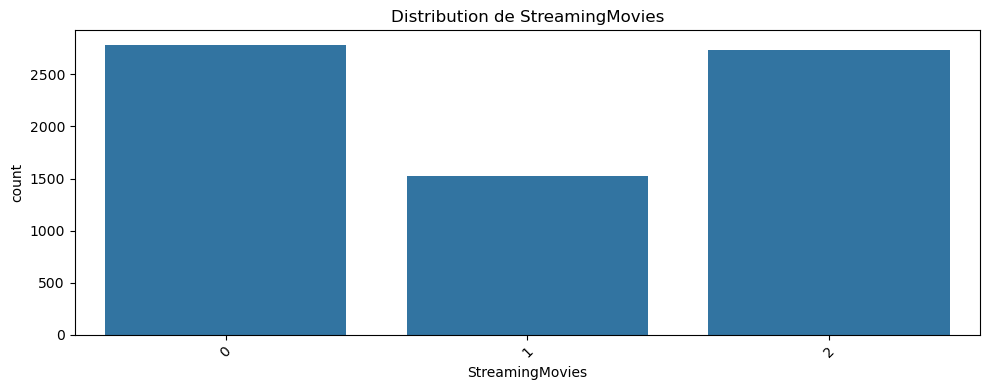


Analyse de la variable : Contract
       Nombre  Pourcentage
0        3875        55.02
2        1695        24.07
1        1473        20.91
TOTAL    7043       100.00




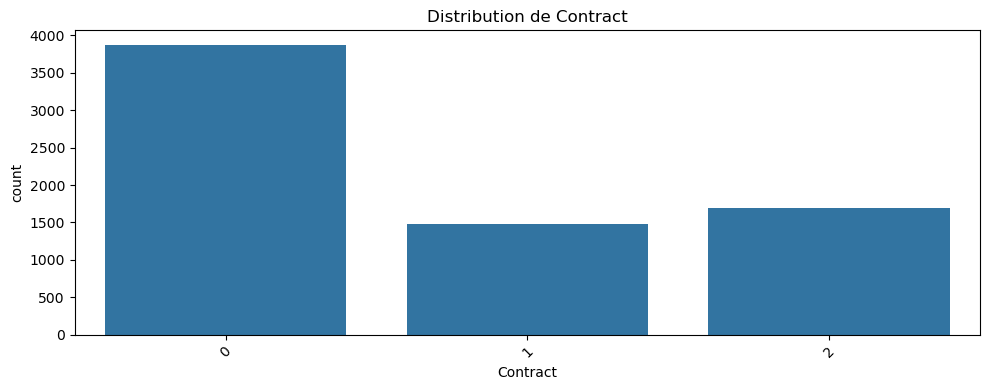


Analyse de la variable : PaperlessBilling
       Nombre  Pourcentage
1        4171        59.22
0        2872        40.78
TOTAL    7043       100.00




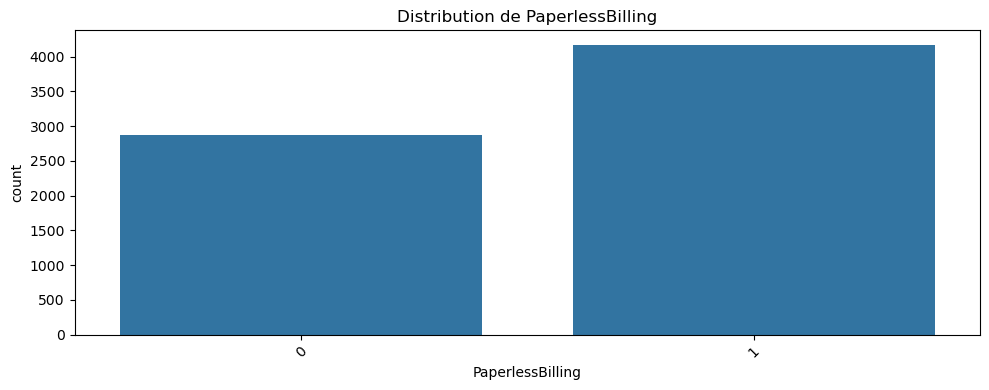


Analyse de la variable : PaymentMethod
       Nombre  Pourcentage
2        2365        33.58
3        1612        22.89
0        1544        21.92
1        1522        21.61
TOTAL    7043       100.00




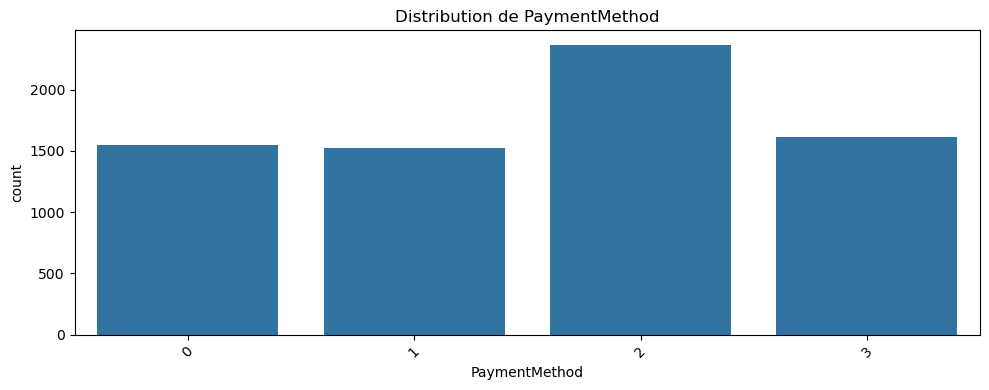


Analyse de la variable : Churn
       Nombre  Pourcentage
0        5174        73.46
1        1869        26.54
TOTAL    7043       100.00




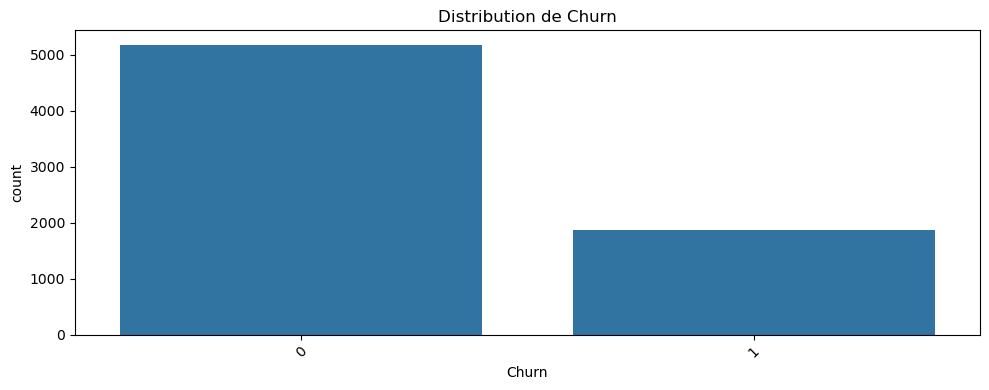

In [ ]:

categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Pour chaque colonne catégorielle
for col in categorical_columns:
    print(f"\n{'='*50}")
    print(f"Analyse de la variable : {col}")
    print(f"{'='*50}")
    
    # Calculer les valeurs uniques et leurs fréquences
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    
    # Créer un DataFrame pour l'affichage
    stats = pd.DataFrame({
        'Nombre': value_counts,
        'Pourcentage': percentages
    })
    
    # Ajouter le total
    total_row = pd.DataFrame({
        'Nombre': [value_counts.sum()],
        'Pourcentage': [100.0]
    }, index=['TOTAL'])
    
    stats = pd.concat([stats, total_row])
    
    # Afficher les statistiques
    print(stats.to_string(float_format=lambda x: '{:.2f}'.format(x)))
    print("\n")
    
    # Créer un graphique pour visualiser la distribution
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 7.2 Encodage des Variables Catégorielles

In [10]:
# Créer un dictionnaire pour stocker les encodeurs
label_encoders = {}

# Encoder les variables catégorielles
for col in categorical_columns + [target_column]:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Afficher les premières lignes des données encodées
print("Aperçu des données après encodage :")
df.head()

Aperçu des données après encodage :


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### 7.3 Standardisation des Variables Numériques

In [11]:
# Standardiser les variables numériques
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Afficher les statistiques après standardisation
print("Statistiques des variables numériques après standardisation :")
df[numeric_columns].describe()

Statistiques des variables numériques après standardisation :


,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,8.070910e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.998503e-01
25%,-9.516817e-01,-9.725399e-01,-8.305558e-01
50%,-1.372744e-01,1.857327e-01,-3.897629e-01
75%,9.214551e-01,8.338335e-01,6.637555e-01
max,1.613701e+00,1.794352e+00,2.826469e+00


## 8. Division des Données

In [12]:
# Séparer features et target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Diviser en ensembles train, validation et test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Dimensions des ensembles de données :")
print(f"Train : {X_train.shape}")
print(f"Validation : {X_val.shape}")
print(f"Test : {X_test.shape}")

# Vérifier la distribution du churn dans chaque ensemble
print("\nDistribution du churn dans chaque ensemble :")
print("Train:", pd.Series(y_train).value_counts(normalize=True))
print("Validation:", pd.Series(y_val).value_counts(normalize=True))
print("Test:", pd.Series(y_test).value_counts(normalize=True))

Dimensions des ensembles de données :
Train : (4225, 19)
Validation : (1409, 19)
Test : (1409, 19)

Distribution du churn dans chaque ensemble :
Train: Churn
0    0.735621
1    0.264379
Name: proportion, dtype: float64
Validation: Churn
0    0.731015
1    0.268985
Name: proportion, dtype: float64
Test: Churn
0    0.735273
1    0.264727
Name: proportion, dtype: float64


## 9. Sauvegarde des Données Prétraitées

In [13]:
# Créer le dossier processed s'il n'existe pas
import os
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Sauvegarder les données
X_train.to_csv(os.path.join(processed_dir, 'X_train.csv'), index=False)
X_val.to_csv(os.path.join(processed_dir, 'X_val.csv'), index=False)
X_test.to_csv(os.path.join(processed_dir, 'X_test.csv'), index=False)
pd.Series(y_train).to_csv(os.path.join(processed_dir, 'y_train.csv'), index=False)
pd.Series(y_val).to_csv(os.path.join(processed_dir, 'y_val.csv'), index=False)
pd.Series(y_test).to_csv(os.path.join(processed_dir, 'y_test.csv'), index=False)

print("Données sauvegardées avec succès dans le dossier 'data/processed/'")

Données sauvegardées avec succès dans le dossier 'data/processed/'
